# **Project Name**    - 



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [171]:
# Import Libraries
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import plotly.express as px
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

import numpy as np
import seaborn as sns
from scipy.stats import *
import math

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [172]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [173]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/csv file/Machine Learning csv files/bank-full.csv', sep = ";")

### Dataset First View

In [174]:
# Dataset First Look
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Dataset Rows & Columns count

In [175]:
# Dataset Rows & Columns count
print(f' The Dataset contains total {df.shape[0]} rows and {df.shape[1]} columns.')

 The Dataset contains total 45211 rows and 17 columns.


### Dataset Information

In [176]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Duplicate Values

In [177]:
# Dataset Duplicate Value Count
duplicated_value_count=len(df[df.duplicated()])
print("The total number of duplicate values in the dataset is = ",duplicated_value_count)

The total number of duplicate values in the dataset is =  0


#### Missing Values/Null Values

In [178]:
# Missing Values/Null Values Count
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

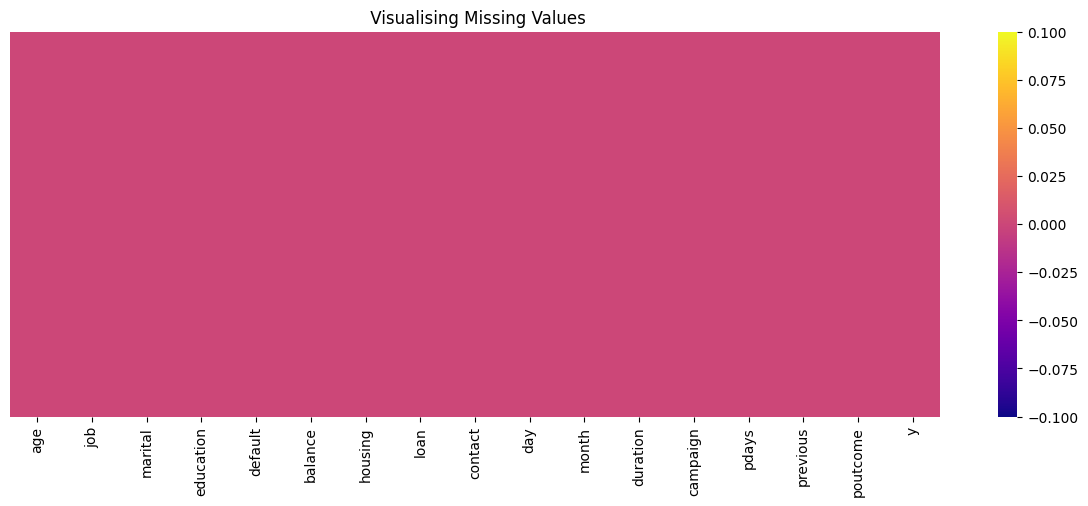

In [179]:
# Visualizing the missing values
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values");

### What did you know about your dataset?

The Dataset contains total 45211 rows and 17 columns. There are no dublicate values and null values in the dataset.

## ***2. Understanding Your Variables***

In [180]:
# Dataset Columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [181]:
# Dataset Describe
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Variables Description 


### <b>Customers details: </b>
*   age (numeric)
*  job : type of job (categorical: admin, blue-collar, entrepreneur, housemaid,management, retired, self-employed, services, student, technician, unemployed, unknown)
*  marital : marital status (categorical: divorced, married, single, unknown; note: 'divorced' means divorced or widowed)
*  education (categorical:high.school, illiterate, professional.course, university.degree, unknown)
*  default: has credit in default? (categorical: no, yes, unknown)
*  housing: has housing loan? (categorical: no, yes, unknown)
*  loan: has personal loan? (categorical: no, yes, unknown)

### <b> Related with the last contact of the current campaign:</b>
*  contact: contact communication type (categorical: cellular,telephone)
*  month: last contact month of year (categorical: jan, feb, mar, april, may,june, july, aug, sep, oct, nov, dec)
*  duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration = 0 then y ='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
*  campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
*  pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
*  previous: number of contacts performed before this campaign and for this client (numeric)
*  poutcome: outcome of the previous marketing campaign (categorical: failure, nonexistent, success)


### <b>Output variable (desired target):</b>
*  y - has the client subscribed a term deposit? (binary: 'yes', 'no')

### Check Unique Values for each variable.

In [182]:
#Extracting categorical features
categorical_features= df.select_dtypes(include='object')

In [183]:
# Check Unique Values for each variable.
for i in categorical_features:
   print(" %s" % i,sep = '\n')
   print(df[i].value_counts())
   print("-"*20)

 job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
--------------------
 marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
--------------------
 education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
--------------------
 default
no     44396
yes      815
Name: default, dtype: int64
--------------------
 housing
yes    25130
no     20081
Name: housing, dtype: int64
--------------------
 loan
no     37967
yes     7244
Name: loan, dtype: int64
--------------------
 contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
--------------------
 month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr

## 3. ***Data Wrangling***

### Data Wrangling Code

In [184]:
# Write your code to make your dataset analysis ready.
#Extracting continous features
continuous_features = df.select_dtypes(include='int64')

### What all manipulations have you done and insights you found?



*   The features have been splitted in continous features and categorical features

*   In the data set there are 45211 rows and 17 columns.

*   Data does not contain any missing values.
*   Data does not cointain any duplicate value as well.
*   Data conitains 10 categorical columns.
*   And remainings are numerical i.e 7.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

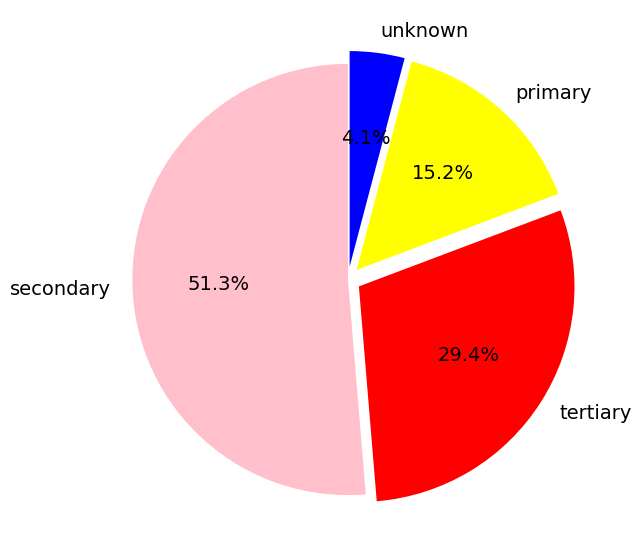

In [185]:
# Chart - 1 visualization code of Education of customers
plt.rcParams['figure.figsize'] = 7,7
labels = df['education'].value_counts().index.tolist()
sizes = df['education'].value_counts().tolist()
explode = (0, 0.06,0.06,0.06)
colors = ['pink', 'red', 'yellow','blue']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

[Text(0.5, 1.0, 'Count of job categories')]

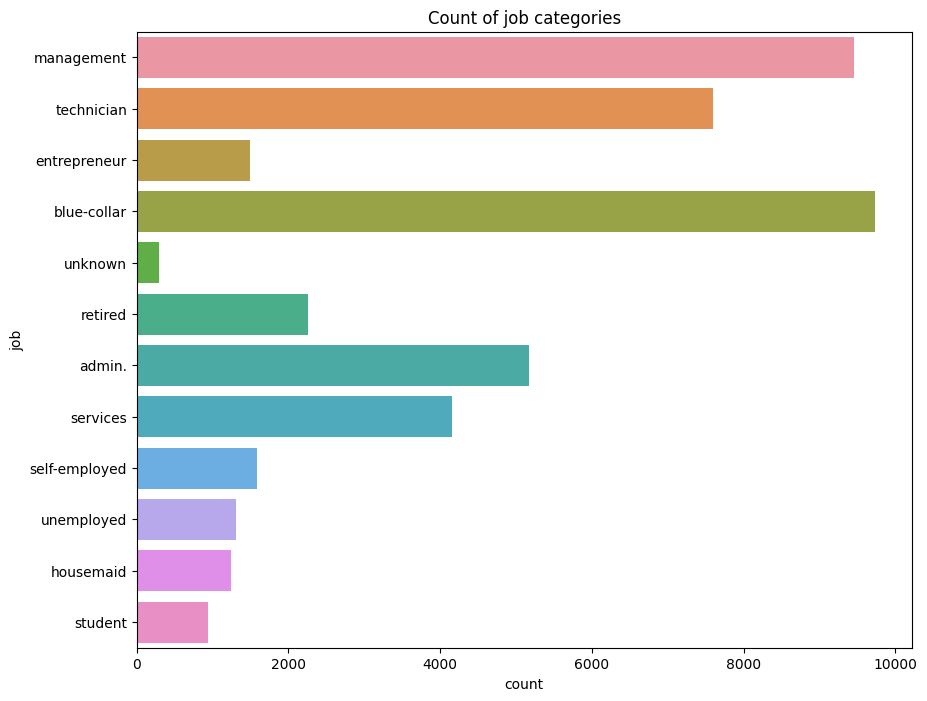

In [186]:
# Chart - 2 visualization code for job category of customers
fig,ax=plt.subplots(figsize=(10,8))
sns.countplot(data=df,y='job',)
ax.set(title='Count of job categories')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

[Text(0.5, 1.0, 'Total of each marital categories')]

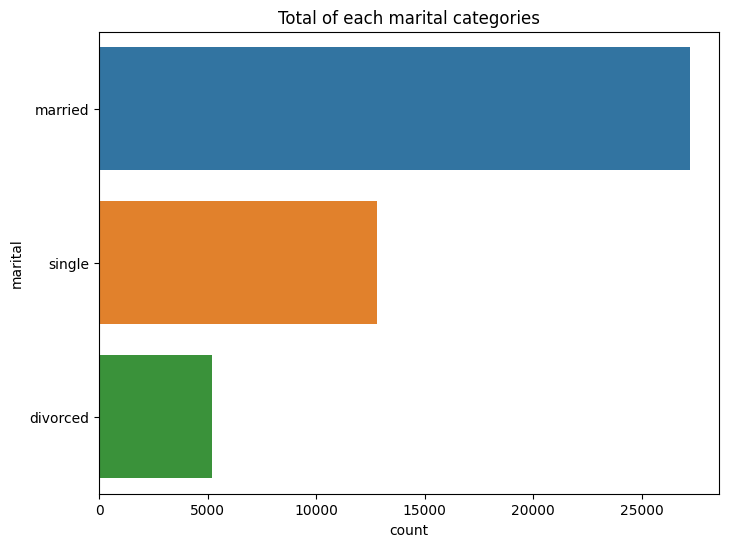

In [187]:
# Chart - 3 visualization code of maritial status of the customers
fig,ax=plt.subplots(figsize=(8,6))
sns.countplot(data=df,y='marital',)
ax.set(title='Total of each marital categories')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

[Text(0.5, 1.0, 'Campaign on each months')]

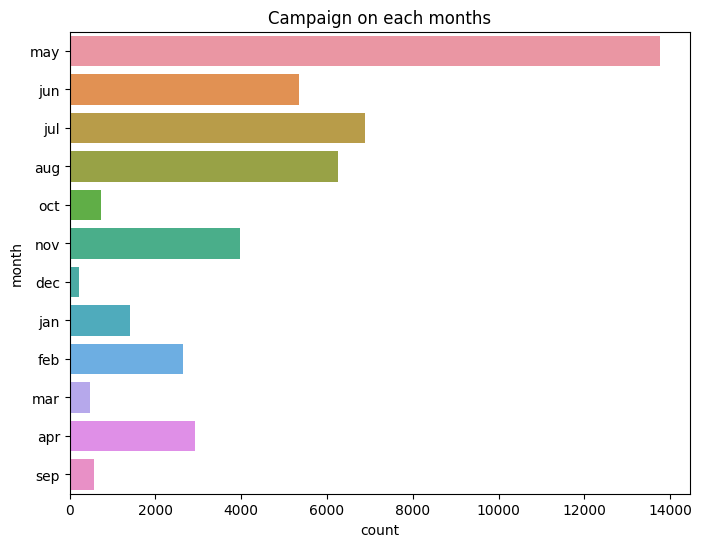

In [188]:
# Chart - 4 visualization code of campaign on each months
fig,ax=plt.subplots(figsize=(8,6))
sns.countplot(data=df,y='month',)
ax.set(title='Campaign on each months')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

[Text(0.5, 1.0, 'Mode of contact to the customers')]

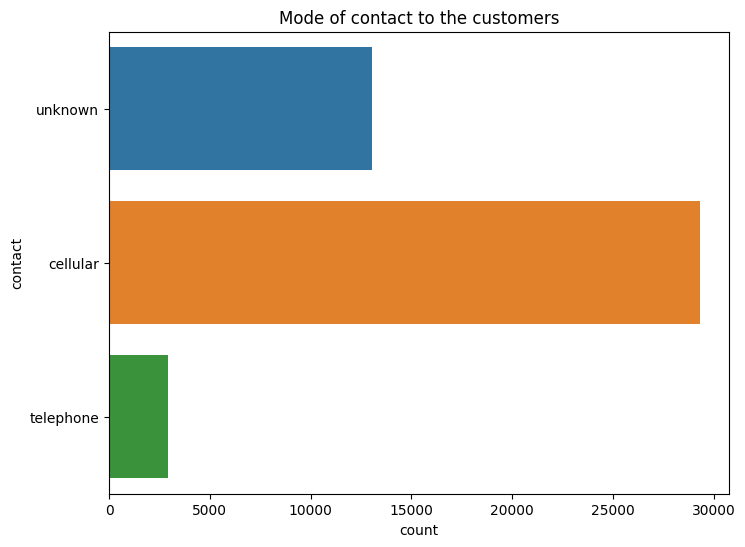

In [189]:
# Chart - 5 visualization code of contact mode of customers
fig,ax=plt.subplots(figsize=(8,6))
sns.countplot(data=df,y='contact',)
ax.set(title='Mode of contact to the customers')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

[Text(0.5, 1.0, 'Outcome of the Campaign ')]

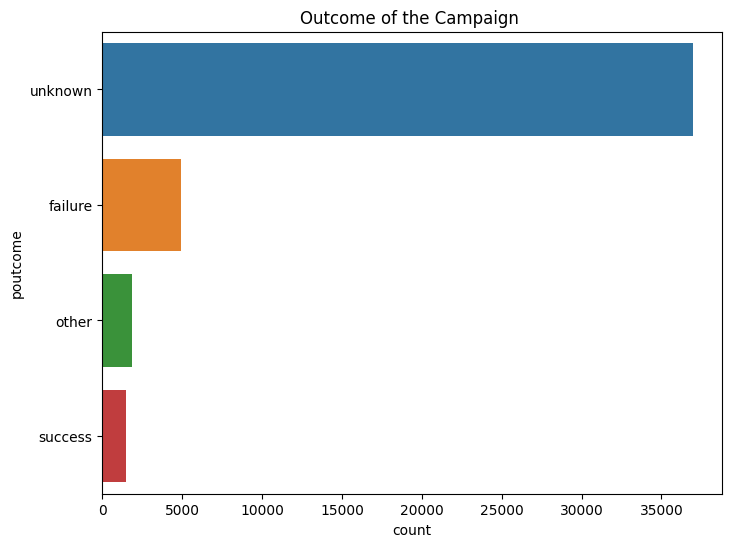

In [190]:
# Chart - 6 visualization code of Outcome of the campaign
fig,ax=plt.subplots(figsize=(8,6))
sns.countplot(data=df,y='poutcome',)
ax.set(title='Outcome of the Campaign ')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

[Text(0.5, 1.0, 'Personal loan taken by the customers')]

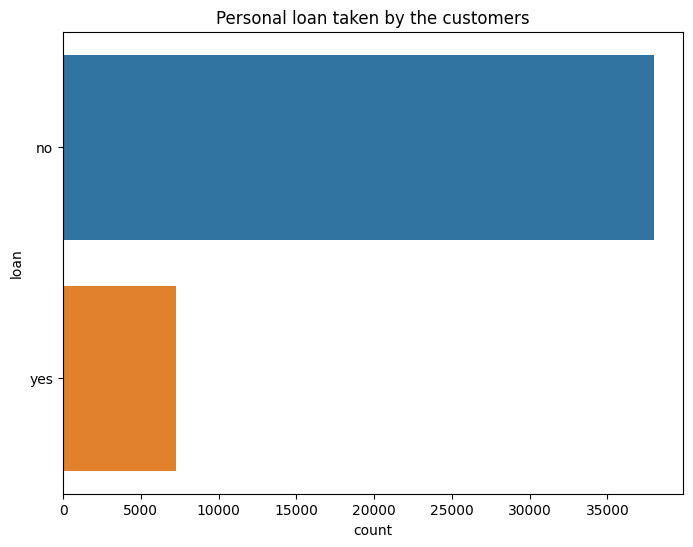

In [191]:
# Chart - 7 visualization code of personal loan taken by the customers
fig,ax=plt.subplots(figsize=(8,6))
sns.countplot(data=df,y='loan',)
ax.set(title='Personal loan taken by the customers')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

<Axes: title={'center': 'Housing loan taken by the customers'}, ylabel='housing'>

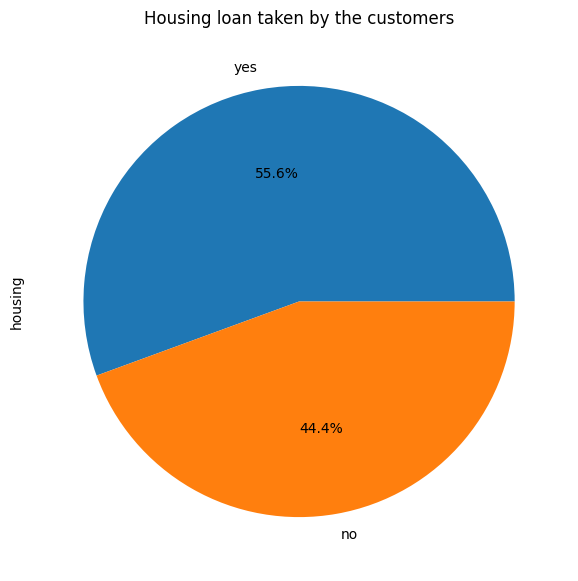

In [192]:
# Chart - 8 visualization code housing loan taken by the customers
df['housing'].value_counts().plot(kind='pie',title="Housing loan taken by the customers",autopct='%1.1f%%')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

<Axes: title={'center': 'Customers has credit in default'}, ylabel='default'>

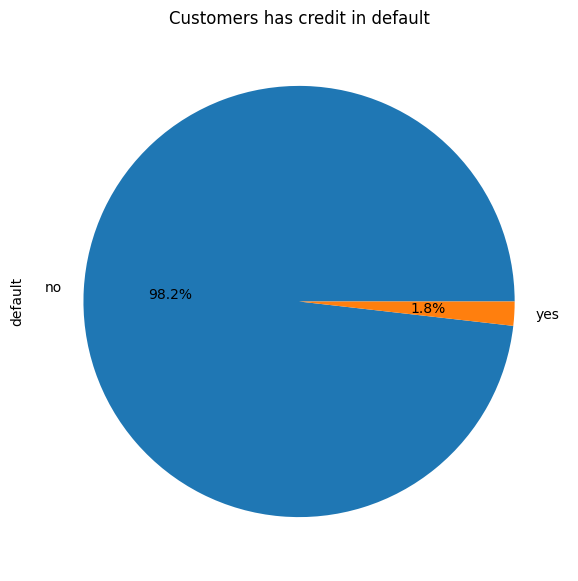

In [193]:
# Chart - 9 visualization code of credit of the customers
df['default'].value_counts().plot(kind='pie',title="Customers has credit in default",autopct='%1.1f%%')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

[Text(0.5, 1.0, 'Number of times contact were performed for campaign')]

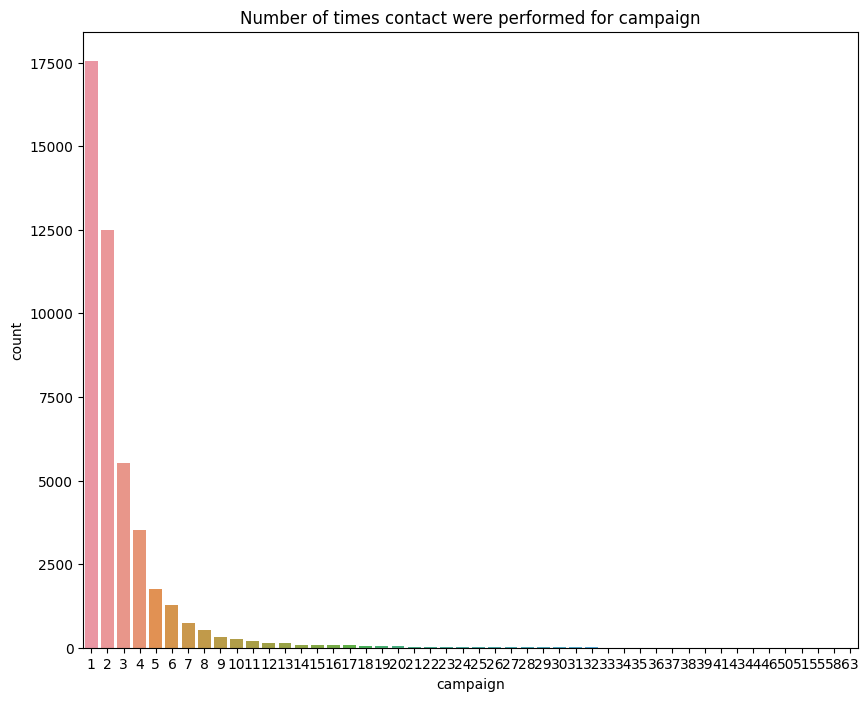

In [194]:
# Chart - 10 visualization code of number of contact were performed for campaign
fig,ax=plt.subplots(figsize=(10,8))
sns.countplot(data=df,x='campaign',)
ax.set(title='Number of times contact were performed for campaign')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

[Text(0.5, 1.0, 'Number of contacts performed before this campaign and for this client')]

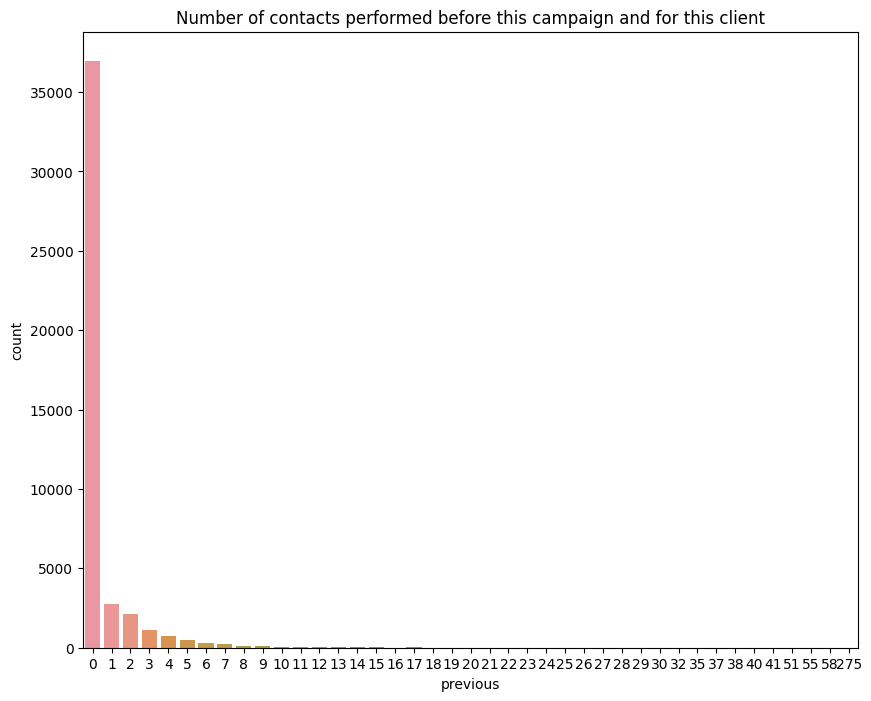

In [195]:
# Chart - 11 visualization code of Number of contacts performed before this campaign and for this client
fig,ax=plt.subplots(figsize=(10,8))
sns.countplot(data=df,x='previous',)
ax.set(title='Number of contacts performed before this campaign and for this client')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

<Axes: title={'center': 'Term deposit subscriped by the clients'}, ylabel='y'>

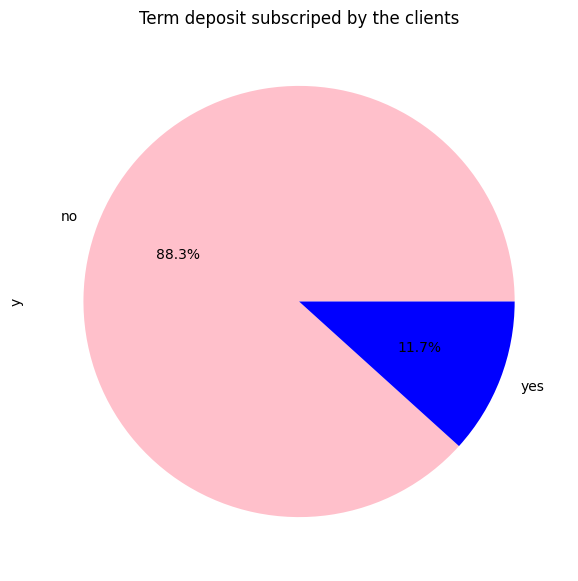

In [196]:
# Chart - 12 visualization code of Term deposit subscriped by the clients
colors=['pink','blue']
df['y'].value_counts().plot(kind='pie',title="Term deposit subscriped by the clients",colors=colors ,autopct='%1.1f%%')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [197]:
# Chart - 13 visualization code of Checking the distribution of campign with respect to duration column
fig = px.scatter(df, x="campaign", y="duration", color="y",title='Distribution of campign with respect to duration column')
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

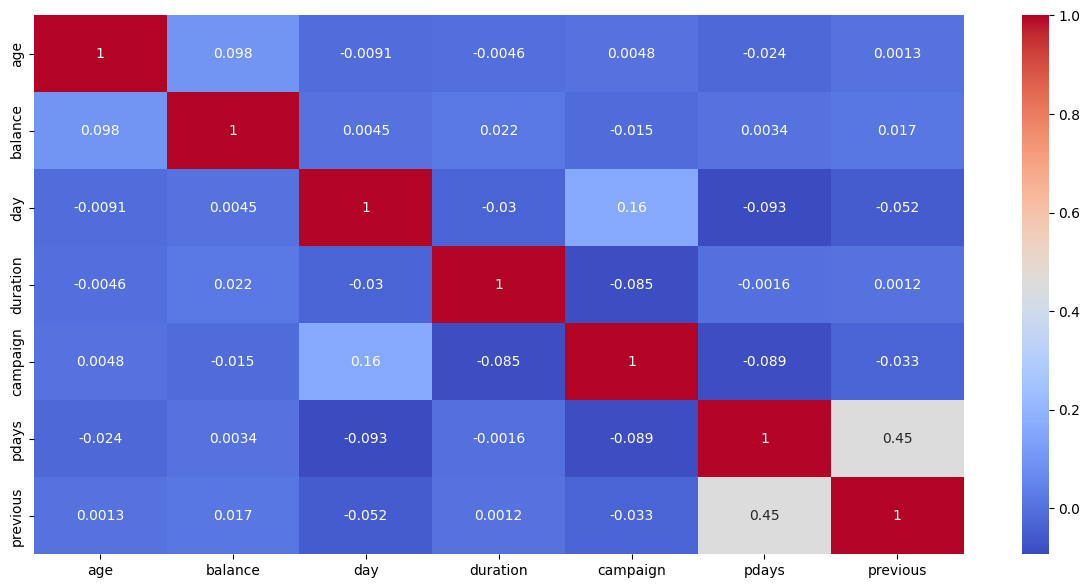

In [198]:
# Correlation Heatmap visualization code
## Checking for correlation.
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

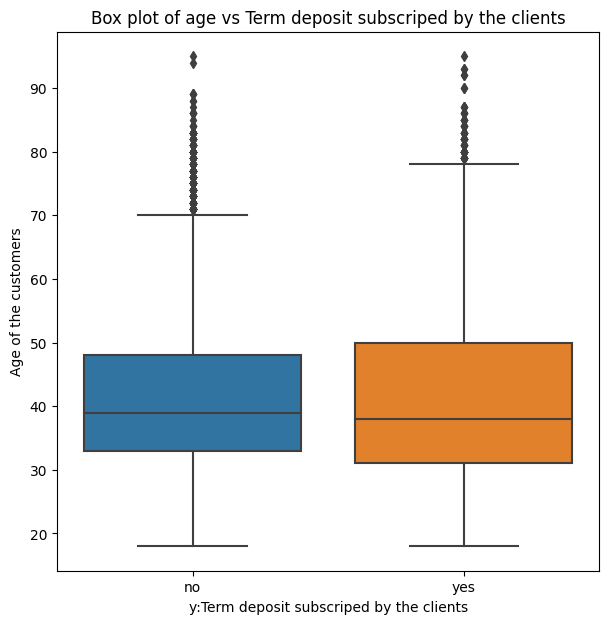

In [199]:
# Pair Plot visualization code of age versus Term deposit subscriped by the clients
sns.boxplot(y=df['age'], x=df['y'])
plt.title('Box plot of age vs Term deposit subscriped by the clients')
plt.xlabel('y:Term deposit subscriped by the clients')
plt.ylabel('Age of the customers')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

In [200]:
# Function for hypothetical testing
class statistic:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

In [201]:
# calculating variance
variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)

In [202]:
# creating instance of the class
statistic = statistic()

In [203]:
zcdf = lambda x: norm(0,1).cdf(x)

In [204]:
def p_value(z,tailed):
  z=round(zcdf(z),10)
  if tailed=='l':
    return z
  elif tailed == 'r':
    return 1-z
  elif tailed == 'd':
    if z>0.5:
      return 2*(1-z)
    else:
      return 2*z
  else:
    return np.nan

In [205]:
# Function for conclusion of statistical test
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Average call duration is more than 300 seconds.
* **Null Hypothesis H0** : ℳ = 300   , Mean duration is 300
* **Alternative Hypothesis H1** : ℳ !=300 , Mean duration is not 300

#### 2. Perform an appropriate statistical test.

In [206]:
# Perform Statistical Test to obtain P-Value
relevant_df = df['duration'].copy()
hypothesis_mean = 300
size = 150
relevant_df = relevant_df[150:300]
std = np.std(relevant_df)
sample_mean = np.mean(relevant_df)
z = statistic.mean(hypothesis_mean,sample_mean,size,std)
p = p_value(z,'d') #both tailed test
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 0.4934265322.


##### Which statistical test have you done to obtain P-Value?

Z score test was conducted

##### Why did you choose the specific statistical test?

The standard deviation value was known for that Z score test was conducted

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Lets formulate our hypothesis where we considerd that mean account balance of the population is 1000.
* **Null Hypothesis H0** : ℳ > 1000   , Mean account balance is more than 1000
* **Alternative Hypothesis H1** : ℳ <=1000  , Mean account balance is not more than 1000

#### 2. Perform an appropriate statistical test.

In [207]:
# Perform Statistical Test to obtain P-Value
relevant_df = df['balance'].copy()
hypothesis_mean = 1000
size = 150
relevant_df = relevant_df[-150:]
std = np.std(relevant_df)
sample_mean = np.mean(relevant_df)
z = statistic.mean(hypothesis_mean,sample_mean,size,std)
p = p_value(z,'l') #one tailed test
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 0.9998005825.


##### Which statistical test have you done to obtain P-Value?

Z score test was conducted

##### Why did you choose the specific statistical test?

The standard deviation value was known for that Z score test was conducted

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Increasing age is the important factor fror term deposite
*  **Null Hypothesis(H0)**  - Increasing age is an important factor for term deposit.
* **Alternative Hypothesis(H1)**  - Age is not related to term deposit.

#### 2. Perform an appropriate statistical test.

In [208]:
# Converting categorical features to binary output
df[['default','housing','loan','y']]=df[['default','housing','loan','y']].replace(["yes","no"],[1,0])

In [209]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency
  
# defining the table
data = [df['age'], df['y']]
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (failed to reject H0)')


p value is 1.0
Independent (failed to reject H0)


##### Which statistical test have you done to obtain P-Value?

Chi square test was conducted

##### Why did you choose the specific statistical test?

A chi-square test is used in statistics to test the independence of two variables. Our aim was to know whether age is related to the response variable or not so we used this test here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [210]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values in the dataset

### 2. Handling Outliers

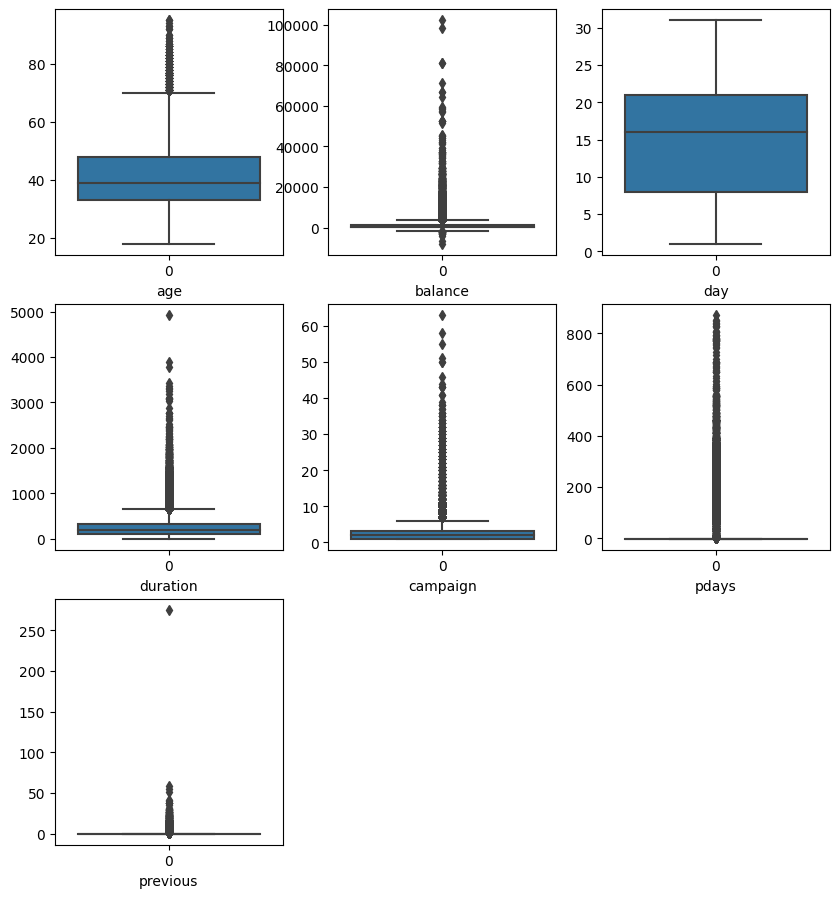

In [211]:
# Handling Outliers & Outlier treatments
# Box plot for checking the outliers
plt.figure(figsize=(10,30), facecolor='white')
plotnumber =1
for continuous_features in continuous_features:
    ax = plt.subplot(8,3,plotnumber)
    sns.boxplot(df[continuous_features])
    plt.xlabel(continuous_features)
    plotnumber+=1
plt.show()

In [212]:
from scipy import stats
z = np.abs(stats.zscore(df[['age','balance','duration','campaign','pdays','previous']]))
print(z)
df=df[(z<3).all(axis=1)]
df.shape

            age   balance  duration  campaign     pdays  previous
0      1.606965  0.256419  0.011016  0.569351  0.411453  0.251940
1      0.288529  0.437895  0.416127  0.569351  0.411453  0.251940
2      0.747384  0.446762  0.707361  0.569351  0.411453  0.251940
3      0.571051  0.047205  0.645231  0.569351  0.411453  0.251940
4      0.747384  0.447091  0.233620  0.569351  0.411453  0.251940
...         ...       ...       ...       ...       ...       ...
45206  0.947747  0.176460  2.791329  0.076230  0.411453  0.251940
45207  2.831227  0.120447  0.768224  0.246560  0.411453  0.251940
45208  2.925401  1.429593  3.373797  0.721811  1.436189  1.050473
45209  1.512791  0.228024  0.970146  0.399020  0.411453  0.251940
45210  0.370689  0.528364  0.399328  0.246560  1.476138  4.523577

[45211 rows x 6 columns]


(40209, 17)

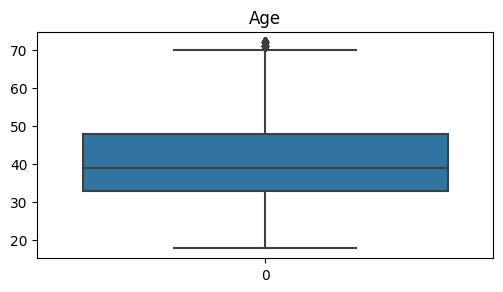

In [213]:
#checking outliers removed ot not
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(df['age'])
plt.title("Age")
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

In order to deal with outliers and scaled down the data the z score technique was used.

### 3. Categorical Encoding

In [214]:
# Encode your categorical columns
# one hot encoding in features  'marital', 'education', 'poutcome', 'contact.
df = pd.get_dummies(df,columns=['job', 'marital', 'education', 'poutcome', 'contact'])
df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,0,2143,1,0,5,may,261,1,-1,...,0,1,0,0,0,0,1,0,0,1
1,44,0,29,1,0,5,may,151,1,-1,...,1,0,0,0,0,0,1,0,0,1
2,33,0,2,1,1,5,may,76,1,-1,...,1,0,0,0,0,0,1,0,0,1
3,47,0,1506,1,0,5,may,92,1,-1,...,0,0,1,0,0,0,1,0,0,1
4,33,0,1,0,0,5,may,198,1,-1,...,0,0,1,0,0,0,1,0,0,1


#### What all categorical encoding techniques have you used & why did you use those techniques?

One Hot Encoding was used for categorical variables, because for machine learning model the varialbls should be in binory form.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [215]:
# Manipulate Features to minimize feature correlation and create new features
# dropping month and duration column from the dataset
df = df.drop(columns=['duration'], axis=1)
df = df.drop(columns=['month'], axis=1)


#### 2. Feature Selection

In [216]:
# Select your features wisely to avoid overfitting
# Independent variable
x=df.drop(['y'],axis=1)

# Dependent variable
y=df['y']  

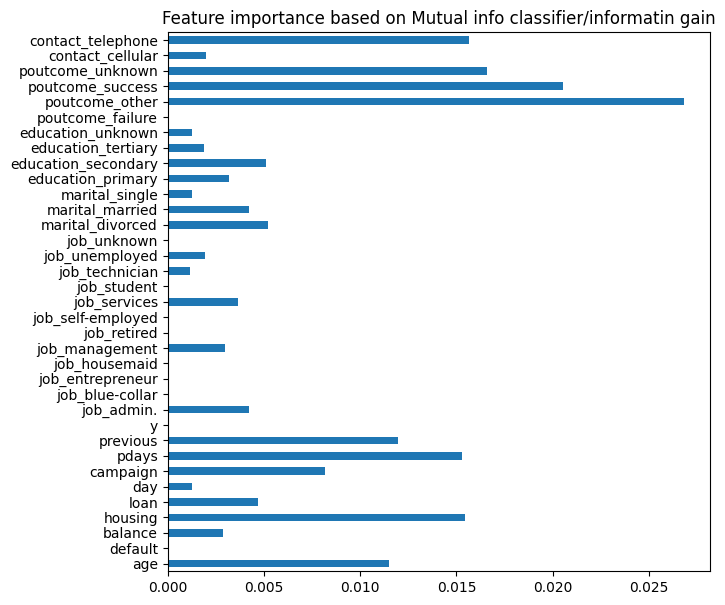

In [217]:
# Information gain method for feature selection
from sklearn.feature_selection import mutual_info_classif

importance = mutual_info_classif(x,y)
feat_importances = pd.Series(importance,df.columns[0:len(df.columns[0:35])])
feat_importances.plot(kind='barh')
plt.title("Feature importance based on Mutual info classifier/informatin gain")
plt.show()

##### What all feature selection methods have you used  and why?

Information gain method is used for future selection.It calculates the reduction in entropy from the transformation of a dataset. It is the efficient method for future selection.

##### Which all features you found important and why?

As per technique used above we can say that all the features that we have included has significant importance . So we are keeping all of them.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Since we have treated the outliers above and in the next section we are going to scale the data using standard scaler where we will tansform the numerical features in the scale of 0 to 1. So we do not need data transformation now.

### 6. Data Scaling

In [233]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
df1 = df.copy()

scaler = StandardScaler()
num_cols = ['age', 'balance', 'day', 'campaign', 'previous']
df1[num_cols] = scaler.fit_transform(df1[num_cols])

df1.head()

,age,default,balance,housing,loan,day,campaign,pdays,previous,y,...,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown
0,1.719153,0,0.615006,1,0,-1.293683,-0.75041,-1,-0.333655,0,...,0,1,0,0,0,0,1,0,0,1
1,0.331162,0,-0.612065,1,0,-1.293683,-0.75041,-1,-0.333655,0,...,1,0,0,0,0,0,1,0,0,1
2,-0.759402,0,-0.627737,1,1,-1.293683,-0.75041,-1,-0.333655,0,...,1,0,0,0,0,0,1,0,0,1
3,0.628589,0,0.245260,1,0,-1.293683,-0.75041,-1,-0.333655,0,...,0,0,1,0,0,0,1,0,0,1
4,-0.759402,0,-0.628317,0,0,-1.293683,-0.75041,-1,-0.333655,0,...,0,0,1,0,0,0,1,0,0,1


##### Which method have you used to scale you data and why?

StandardScalar method was used to scale the data.This method is sed when the data is normally distributed.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, here we do not need Dimensionality Reduction as we have seen above that all the features are significant enough and there are only 31 columns in our dataset.

### 8. Data Splitting

In [235]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Select Features
indepedent_variables = df1.drop(['y'], axis=1)

# Select Target
target = df1['y']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(indepedent_variables , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (32167, 35)
Shape of testing feature: (8042, 35)
Shape of training label: (32167,)
Shape of training label: (8042,)


##### What data splitting ratio have you used and why? 

80:20 ratio is used for data splitting.This ratio are mostly used in ML model

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [222]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [223]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [224]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [225]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [226]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [227]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [228]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [229]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [230]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [231]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [232]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***